In [75]:
!pip install yfinance

In [76]:
import yfinance as yf

In [77]:
data = yf.download('AAPL', start='2023-01-01', end='2025-01-01')

C:\Users\ay964\AppData\Local\Temp\ipykernel_1300\3898690068.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('AAPL', start='2023-01-01', end='2025-01-01')
[*********************100%***********************]  1 of 1 completed


In [78]:
data.head(10)
data.columns
data.columns = ['_'.join(col) if isinstance(col, tuple) else col for col in data.columns]


In [79]:
data['MA5']=data['Close_AAPL'].rolling(window=5).mean()
data['MA10']=data['Close_AAPL'].rolling(window=10).mean()

In [80]:
data['prev_close']=data['Close_AAPL'].shift(1)
data['Return'] = data['Close_AAPL'].pct_change()
data.dropna(inplace=True)


In [81]:
data.head()

,Close_AAPL,High_AAPL,Low_AAPL,Open_AAPL,Volume_AAPL,MA5,MA10,prev_close,Return
Date,,,,,,,,,
2023-01-17,134.049484,135.380701,132.264658,132.954920,63646600,131.807098,128.640755,132.885864,0.008757
2023-01-18,133.329636,136.682346,133.152131,134.917246,69672800,132.690640,129.640655,134.049484,-0.005370
2023-01-19,133.388794,134.355161,131.909655,132.215341,58280400,133.041690,130.519263,133.329636,0.000444
2023-01-20,135.952606,136.100529,132.353374,133.398630,80223600,133.921277,131.786389,133.388794,0.019221
2023-01-23,139.147568,141.326840,135.982203,136.199145,81760300,135.173618,132.919409,135.952606,0.023501


In [93]:
data['Target'] = data['Close_AAPL'].shift(-1)
data.dropna(inplace=True)

X = data[['prev_close', 'MA5', 'MA10', 'Return', 'Volume_AAPL']]
y = data['Target']




In [95]:
from sklearn.model_selection import train_test_split

In [97]:
X.size

2455

In [99]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [101]:
print(X_train.size)
print(X_test.size)

1840
615


In [103]:
from sklearn.linear_model import LinearRegression

In [105]:
model=LinearRegression()

In [107]:
model.fit(X_train,Y_train)

LinearRegression()

In [109]:
y_pred=model.predict(X_test)

In [111]:
from sklearn.metrics import accuracy_score

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

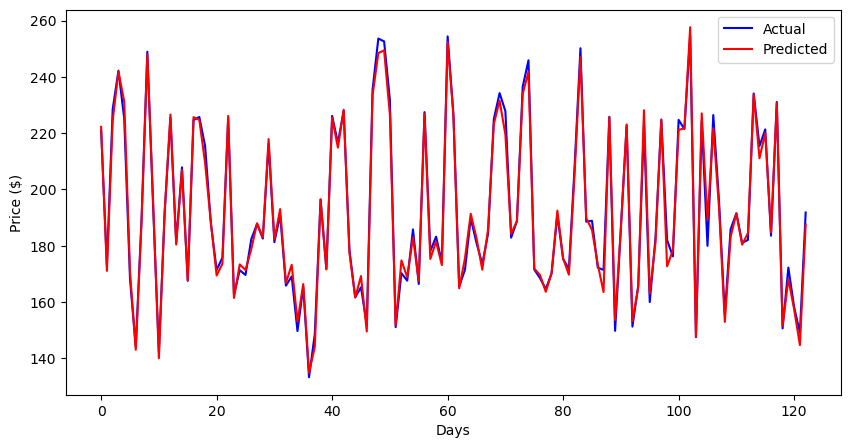

In [115]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(Y_test.values, label='Actual', color='blue')
ax.plot(y_pred, label='Predicted', color='red')
ax.set_xlabel("Days")
ax.set_ylabel("Price ($)")
ax.legend()


In [116]:
rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
r2 = r2_score(Y_test, y_pred)

In [130]:
import numpy as np

X_new = np.array([[135.952606, 133.921277, 131.786389, 0.019221, 80223600]])
y_pred = model.predict(X_new)
print("Predicted next-day closing price:", y_pred[0])


Predicted next-day closing price: 140.05471243622057


C:\Users\ay964\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
